# Method1 Linear Regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline


In [13]:
df=pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [15]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [16]:
df.shape

(237, 4)

In [17]:
X=df['Head Size(cm^3)'].values
Y=df['Brain Weight(grams)'].values


In [18]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print('Y = ({}) X + ({})'.format(b1,b0))


Y = (0.26342933948939945) X + (325.57342104944223)


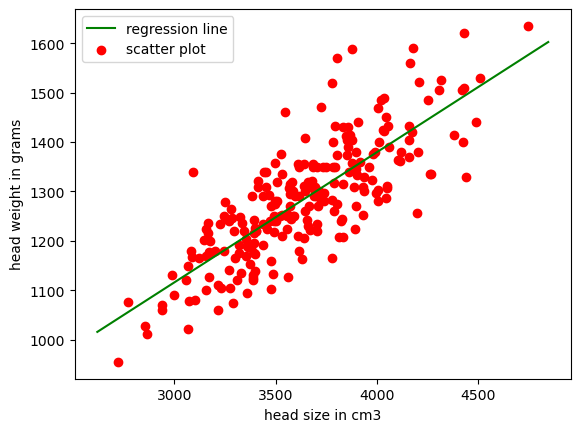

In [19]:
max_x=np.max(X)+100
min_x=np.min(X)-100
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color='green',label='regression line')
plt.scatter(X,Y,color='red',label='scatter plot')
plt.xlabel('head size in cm3')
plt.ylabel('head weight in grams')
plt.legend()
plt.show()

In [20]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [21]:
#linear regression using  scikit learn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r_score=reg.score(X,Y)
print(r_score)
print(r2_score(Y_pred,Y))

0.639311719957
0.4358178197214031


In [22]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(Y_pred,Y)


72.1206213783709

# Method2 Linear Regression

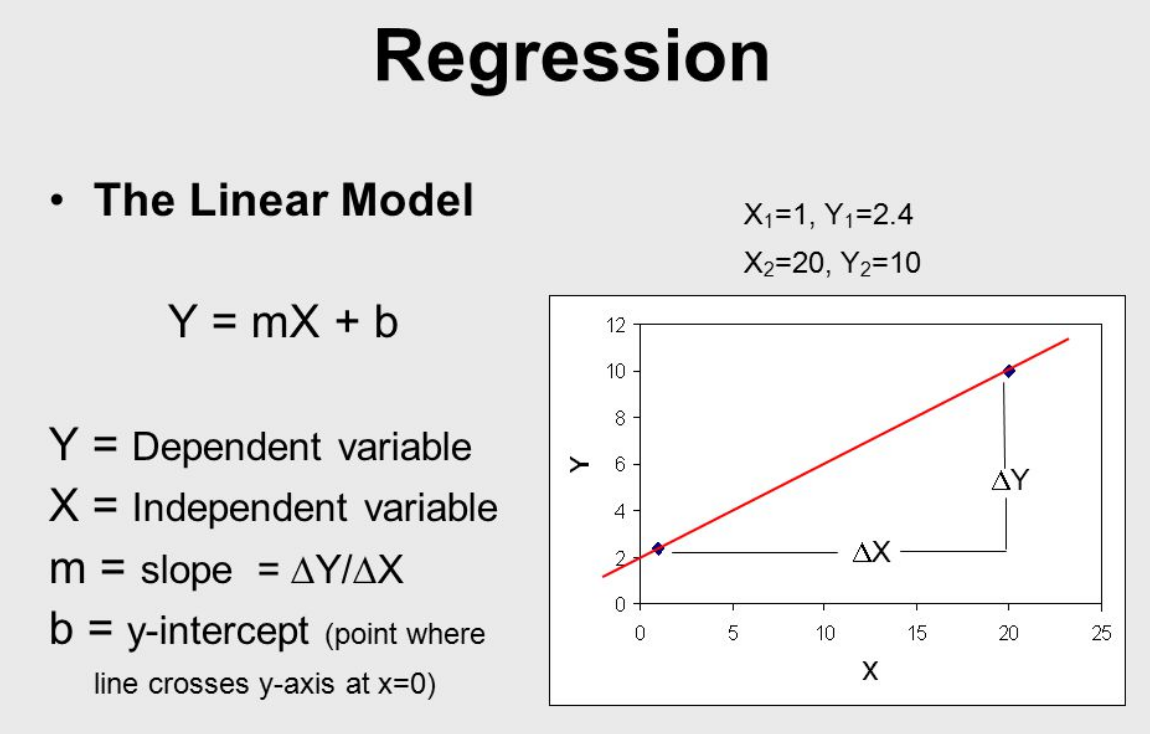

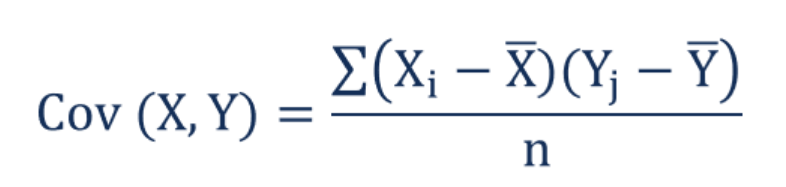

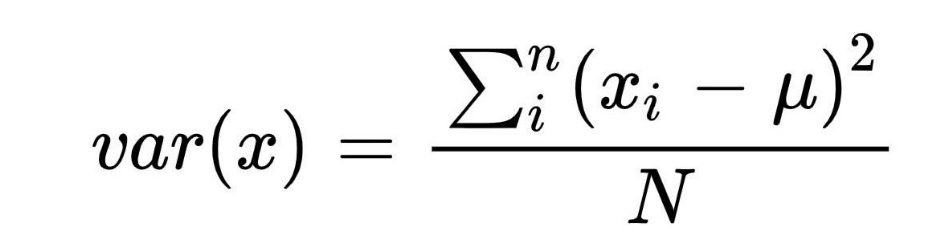

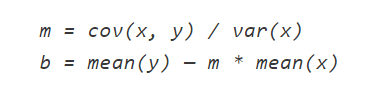

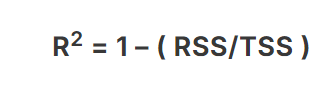
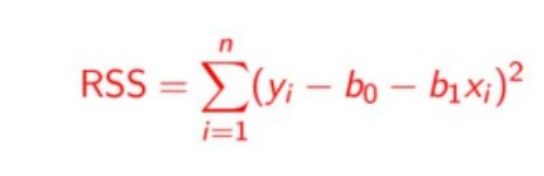
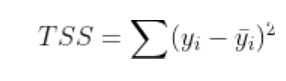
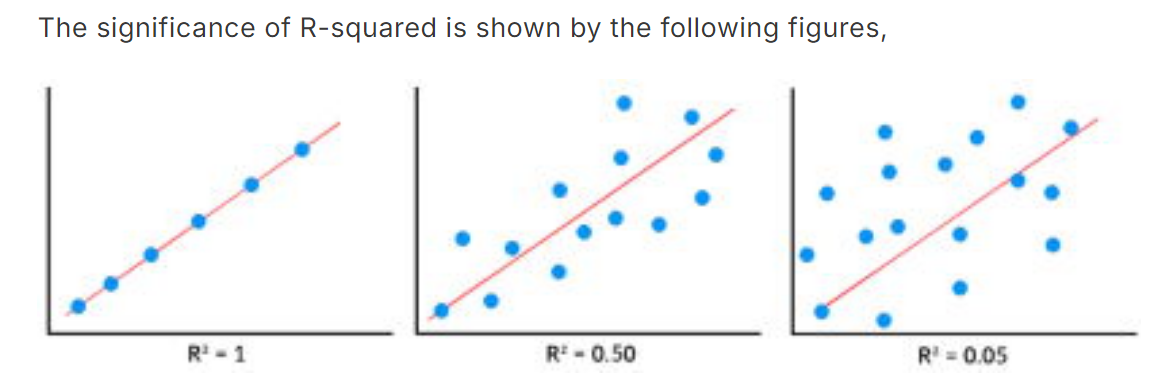
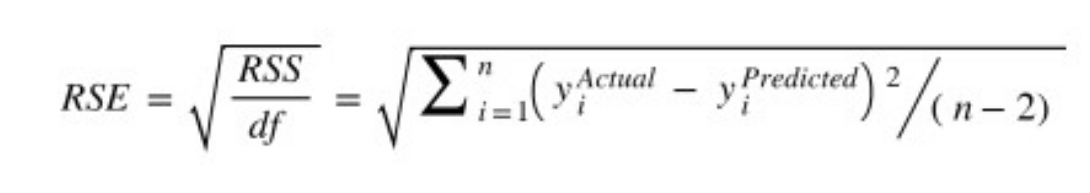

The R2 score of the model is: 0.6491212474877508
The RMSE score of the model is: 62.29359711318667
y = 0.2634293394893993 x + 325.5734210494428


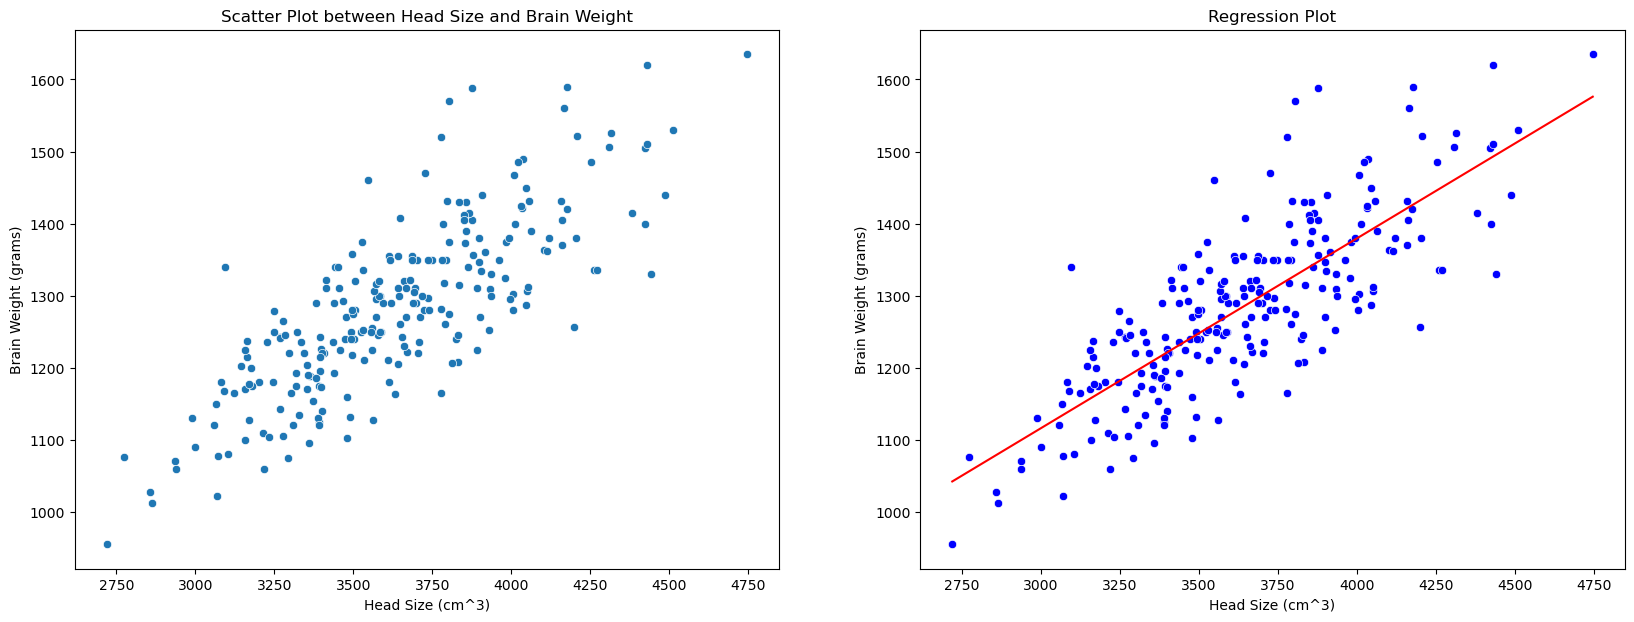

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('headbrain.csv')


x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

def get_mean(arr):
    
    return np.mean(arr)

def get_variance(arr, mean):
    
    return np.sum((arr - mean) ** 2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    
    return np.sum((arr_x - mean_x) * (arr_y - mean_y))

def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    covariance = get_covariance(x, x_mean, y, y_mean)
    variance = get_variance(x, x_mean)
    m = covariance / variance
    c = y_mean - (m * x_mean)
    return m, c

def linear_regression(x_train, y_train, x_test, y_test):
    
    
    m, c = get_coefficients(x_train, y_train)
    predictions = m * x_test + c
    
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print(f"The R2 score of the model is: {r2}")
    print(f"The RMSE score of the model is: {np.sqrt(mse)}")
    
    return predictions

# Use 80% of the data for training and 20% for testing
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


predictions = linear_regression(x_train, y_train, x_test, y_test)

def plot_reg_line(x, y):
    
    m, c = get_coefficients(x, y)
    print(f"y = {m} x + {c}")
    regression_line = m * x + c
    
    plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('Head Size (cm^3)')
    plt.ylabel('Brain Weight (grams)')
    plt.title('Scatter Plot between Head Size and Brain Weight')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=x, y=y, color='blue')
    sns.lineplot(x=x, y=regression_line, color='red')
    plt.xlabel('Head Size (cm^3)')
    plt.ylabel('Brain Weight (grams)')
    plt.title('Regression Plot')
    
    plt.show()


plot_reg_line(x, y)




<Axes: ylabel='Difference'>

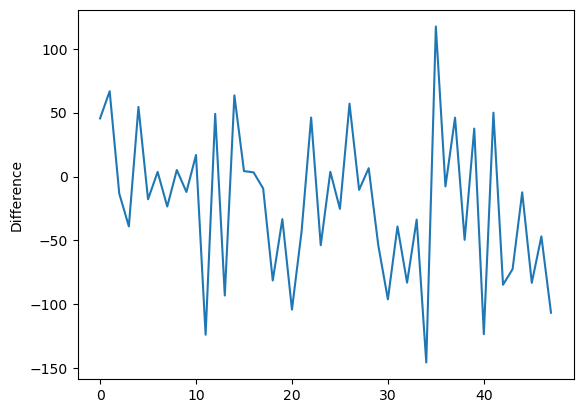

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':(y_test-predictions)})

sns.lineplot(pred_df['Difference'])



In [27]:
predictions

array([1304.51230836, 1170.21908155, 1217.3964419 , 1129.03249712,
       1300.51845775, 1267.81880587, 1072.36974158, 1143.51020559,
       1214.90028527, 1252.09301909, 1203.1683491 , 1218.89413588,
       1185.94486834, 1198.17603583, 1341.45542651, 1145.75674656,
       1301.76653606, 1229.37799373, 1377.40008201, 1208.41027802,
       1059.14011143, 1113.30671034, 1273.80958178, 1113.80594167,
       1126.28672483, 1275.30727576, 1167.97254058, 1190.43795027,
       1171.46715987, 1195.92949486, 1226.13299011, 1224.13606481,
       1095.08476693, 1313.7480879 , 1248.5983998 , 1290.53383122,
       1307.75731198, 1199.92334548, 1429.56975562, 1312.50000958,
       1183.4487117 , 1300.01922642, 1304.76192402, 1182.45024905,
       1227.38106843, 1187.19294665, 1216.89721057, 1226.63222144])

The R2 score of the model is:  0.649121247487751
The RMSE score of the model is:  62.29359711318666


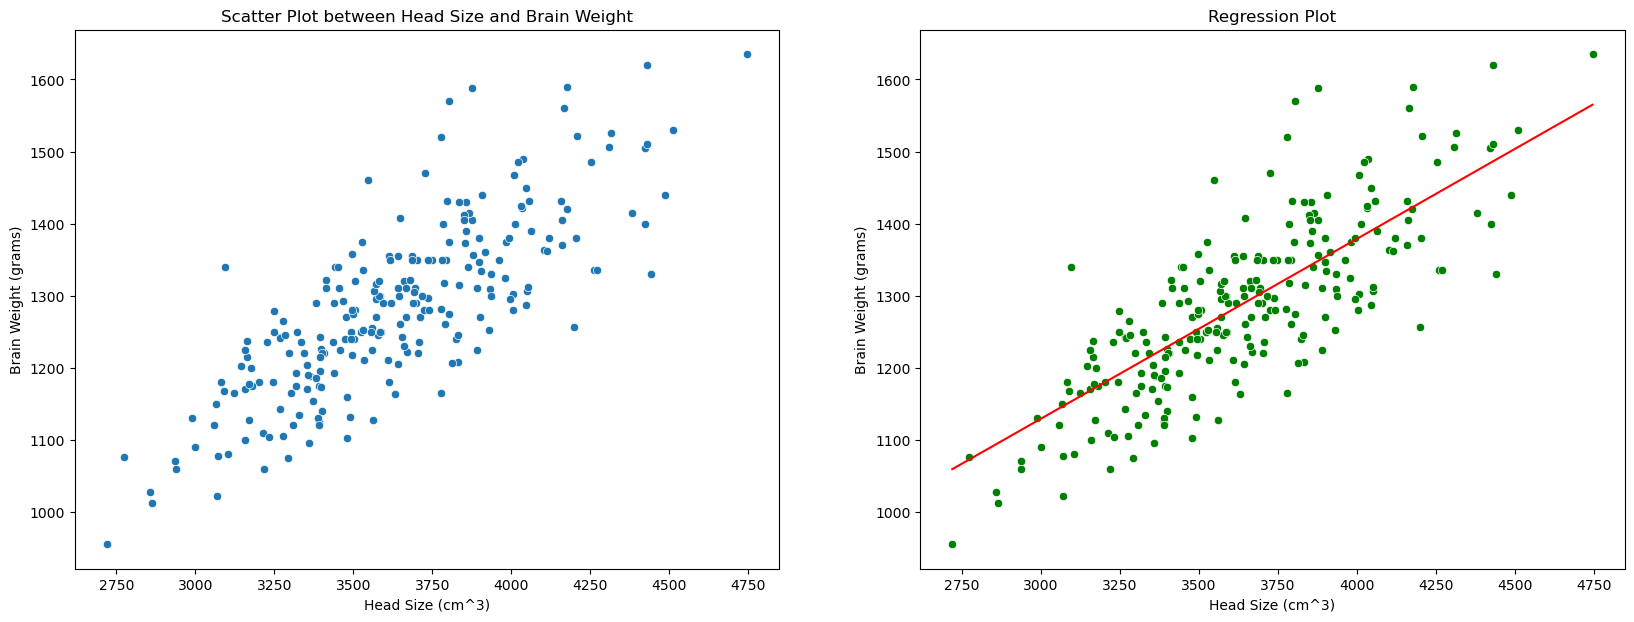

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Read Data
df = pd.read_csv('headbrain.csv')

# Extract the independent and dependent variables
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

# Calculate the split index for 80% training and 20% testing
split_index = int(0.8 * len(x))

# Split the data into training and testing sets
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create and train the linear regression model
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# Make predictions on the test set
predictions = reg.predict(x_test.reshape(-1, 1))

# Calculate R2 score and Mean Squared Error
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("The R2 score of the model is: ", r2)
print("The RMSE score of the model is: ", np.sqrt(mse))

# Predict for a range of values for visualization
visualization_predictions = reg.predict(np.array([i for i in range(int(min(x)), int(max(x)))]).reshape(-1, 1))

# Plot the results
fig = plt.figure(figsize=(20, 7))

# Scatter plot of the original data
plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=y)
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Scatter Plot between Head Size and Brain Weight')

# Scatter plot with regression line
plt.subplot(1, 2, 2)
sns.scatterplot(x=x, y=y, color='green')
sns.lineplot(x=[i for i in range(int(min(x)), int(max(x)))], y=visualization_predictions, color='red')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Regression Plot')

# Show the plots
plt.show()


In [26]:
reg.predict([[3982]])

array([1374.15507839])